# Agrupando las casas de California


En esta tarea se tratará de encontrar cuántos grupos
hay en las casas de california.

Se necesita además el archivo:
*transformation_x_y* o se puede usar sin el archivo y calcular la transformación de nuevo.
Aunque es una computación costosa (aprox. 5-10 min).
Si se desea recalcular, cambiar la variable _CALCULATE_TSNE_ a _True_.

```python
CALCULATE_TSNE = True
```


![suburbios_crean_trafico](https://cdn-newsandguts.pressidium.com/wp-content/uploads/2019/11/GettyImages-519912777-e1575040059772-980x550.jpg)

### Características del  _dataset_

Número de ejemplos 20,640

8 Características numéricas.

1 blanco de regresión.

Información sobre las características:

* MedInc Mediana de los ingresos por bloque
* HouseAge Edad mediana de las casas por bloque
* AveRooms Promedio de cuartos en casas por bloque
* AveBedrms Promedio de dormitorios en casas por bloque
* Population Población en el bloque
* AveOccup Promedio de habitantes en casas por bloque
* Latitude Latitud del bloque
* Longitude Longitud del bloque

Atributos faltantes, ninguno.

Este _dataset_ fue obtenido del repositorio _StatLib_. http://lib.stat.cmu.edu/datasets/

La variable blanco es la mediana del valor de las casas por bloque para los distritos de California.

El _dataset_ fue obtenido del censo de 1990, y se usa un renglón por bloque.

Un bloque es la unidad geográfica más pequeña para la cual el Buró de Censos de E.U.A publica datos.
Un bloque generalmente tiene una población de 600 a 3,000 personas.

### Importación

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.datasets import fetch_california_housing
from sklearn.manifold import TSNE

# Global Vars
SEED = 421067
# Warning: heavy computation
# 5-10 min
CALCULATE_TSNE = False
PERPLEXITY = 17

### Funciones

In [2]:
def get_houses():
    X, y = fetch_california_housing(return_X_y=True)
    #y = np.log(y)
    X = np.concatenate([X, y[..., np.newaxis]], axis=1)
    return X
    
def plot_clusters_california(x, y, clusters,
                             title='Clusters in California Houses',
                             alpha=1/4):
    plt.figure(figsize=(12, 10))
    plt.scatter(x, y,
                c=clusters,
               alpha=alpha)
    plt.title(title)

### Obteniendo los datos

In [3]:
X = get_houses()

### Ejercicio 1 Estandarización
Estandarizar la matriz de datos X usando:

```python
from sklearn.preprocessing import StandardScaler
```

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Transformación de los datos para graficación

In [5]:
# Warning: heavy computation
# 5-10 min

if CALCULATE_TSNE:
    visualization_axes = TSNE(n_jobs = -1,
                              perplexity=PERPLEXITY,
                              random_state=SEED).fit_transform(X)
    tsne_x = visualization_axes[:,0]
    tsne_y = visualization_axes[:,1]
    # Saving the calculation to disk
    file = open('transformation_x_y', 'wb')
    pickle.dump((tsne_x, tsne_y), file)
    file.close()
else:
    file = open('transformation_x_y','rb')  
    # load the object from the file into var b
    tsne_x, tsne_y = pickle.load(file)
    file.close()

### Ejercicio 2 _Kmeans_

Con la matriz de datos en su forma estandarizada aplicar
_kmeans_, para la importación se puede usar:

```python
from sklearn.cluster import KMeans
```

Acordarse que el hiperparámetro más importante para kmeas
es el número de _clusters_ a encontrar.

In [6]:
from sklearn.cluster import KMeans
clusters_km12 = KMeans(n_clusters=12).fit_predict(X)

### Ejercicio 3 _Kmeans_ Predicción

Predecir a que grupo pertenece cada bloque de casas.
Guardar la predicción porque se continuará trabajando con ella.

In [7]:
#clusters_km = KMeans(n_clusters=24).fit_predict(X)

### Ejercicio 4 Graficar

Graficar la predicción usando el siguente código:

```python
clusters_km = PONER_AQUI_TU_PREDICCION
plot_clusters_california(tsne_x, tsne_y, clusters_km)
```

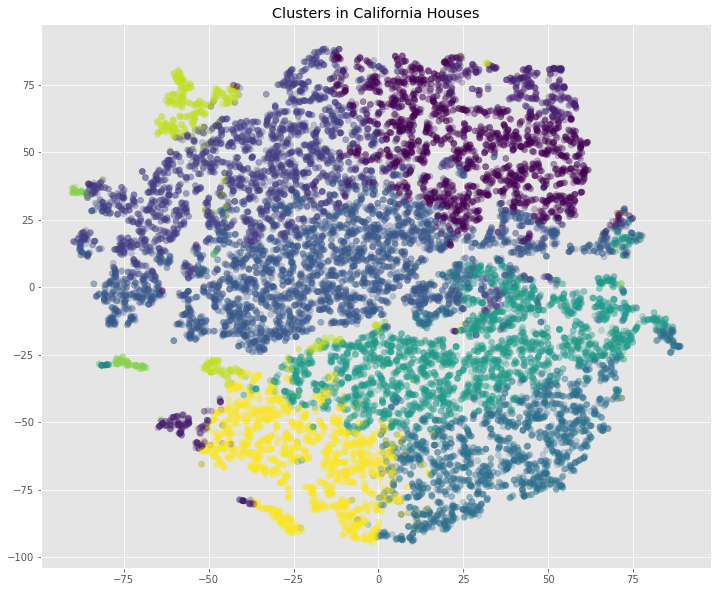

In [8]:
plot_clusters_california(tsne_x, tsne_y, clusters_km12)

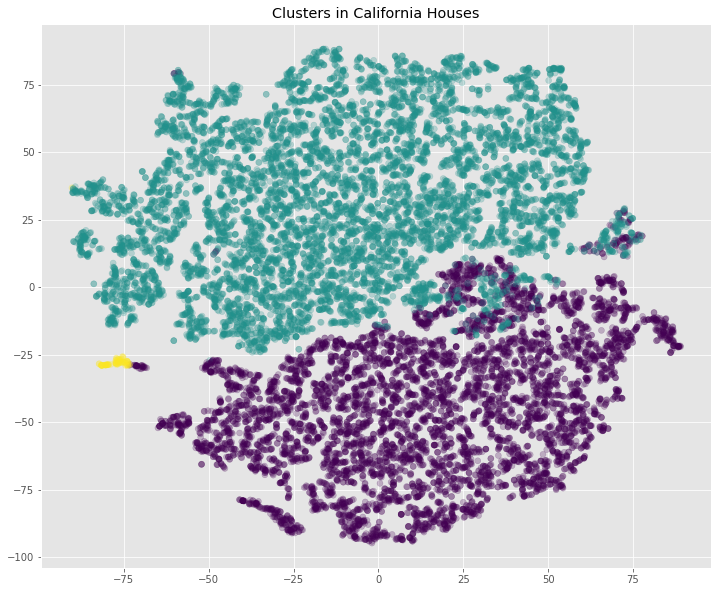

In [9]:
from sklearn.cluster import KMeans
clusters_km3 = KMeans(n_clusters=3).fit_predict(X)
plot_clusters_california(tsne_x, tsne_y, clusters_km3)

### Ejercicio 5 DBSCAN

Ahora empieza lo bueno, como sabemos que nuestro primer
intento con _kmeans_ es bueno.

Intentemos con otras técnicas, para compara un poco.

1. Realizar _clustering_ con DBSCAN.
Acordarse que hay 2 hiperpaŕametros importantes:
*eps* y *min_samples*.

2. Gráficar los resultados, usando la función
provista.

```python
from sklearn.cluster import DBSCAN
```



In [10]:
from sklearn.cluster import DBSCAN

clusters_db = DBSCAN(eps=0.60, min_samples=12).fit_predict(X)

In [11]:
df = pd.DataFrame({'x': tsne_x,
             'y': tsne_y,
             'clust': clusters_db})
df.clust.value_counts()

 0     15716
-1      4617
 9        99
 2        70
 3        38
 6        18
 1        16
 5        15
 4        15
 8        14
 7        12
 10       10
Name: clust, dtype: int64

In [12]:
# Removing Outliers
df = df[df.clust != -1]

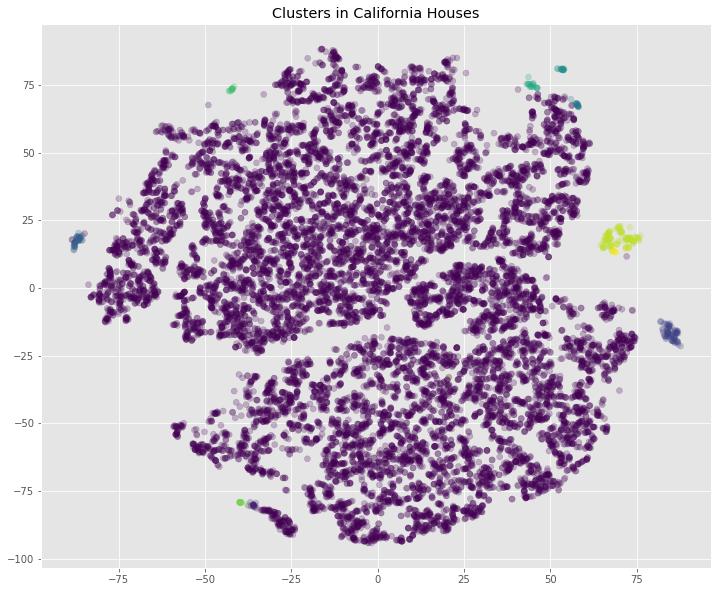

In [13]:
plot_clusters_california(df.x, df.y, df.clust)

#### OPTICS

In [14]:
from sklearn.cluster import OPTICS

a_optics=OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)
a_optics.fit(X)

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.05, min_samples=50, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

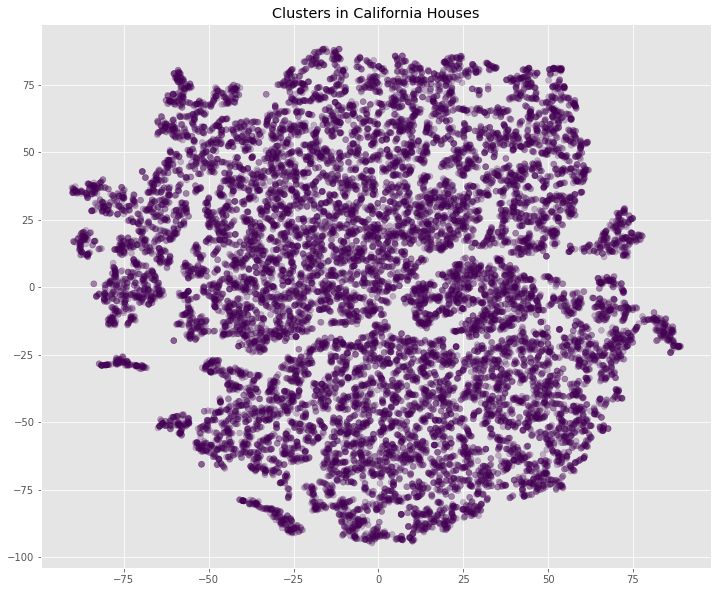

In [15]:
clusters_optics = a_optics.labels_
plot_clusters_california(tsne_x, tsne_y, clusters_optics)

### Ejercicio 6 Agglomerativo

```python
from sklearn.cluster import AgglomerativeClustering
```

In [16]:
from sklearn.cluster import AgglomerativeClustering

a_agg = AgglomerativeClustering(memory='agg_tree',
                                compute_full_tree=True,
                                affinity='euclidean',
                                linkage='ward')

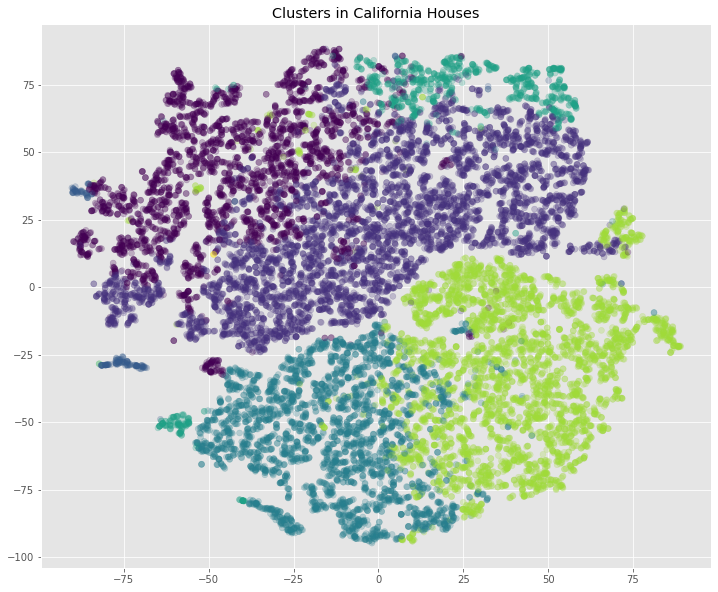

In [17]:
clusters_agg8 = a_agg.set_params(n_clusters=8).fit_predict(X)
plot_clusters_california(tsne_x, tsne_y, clusters_agg8)

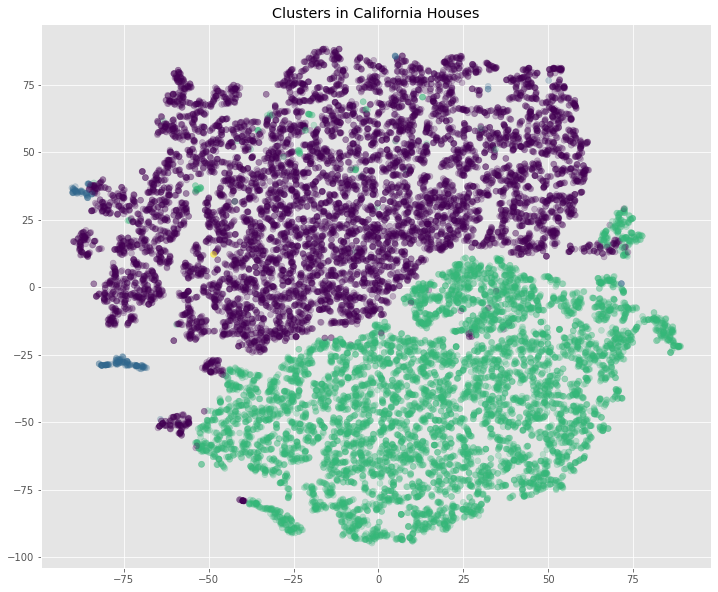

In [18]:
clusters_agg4 = a_agg.set_params(n_clusters=4).fit_predict(X)
plot_clusters_california(tsne_x, tsne_y, clusters_agg4)

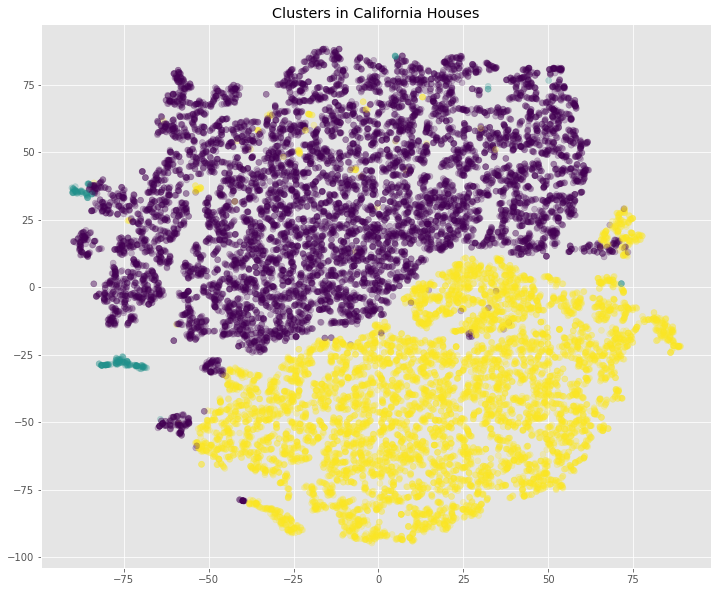

In [19]:
clusters_agg3 = a_agg.set_params(n_clusters=3).fit_predict(X)
plot_clusters_california(tsne_x, tsne_y, clusters_agg3)

### Pregunta final

##### ¿Cuántos grupos dirías que existen en las casas de California?

Hay muchos _outliers_ lo que hace dificíl la agrupación.

Sin remover los _outliers_ diría que solo 3 grupos:
1. _outlier_
2. Grupo 1
3. Grupo 2

Sugeriría volver a hacer el analisis removiendo _outliers_.